# Separation Metrics 

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

Currently its used is in general two metrics to evaluate the separation of clusters. This two metrics are: 

- Inertia (Elbow method) 
- Silhouette coefficient.

### **Clusterization Algorithms**

Mainly the 3 hyperparameters to define a clusterization algorithms are:

1. Initial values.
2. Distance measures ($L_1, L_2$, etc).
3. Number of clusters (most important of all).

To determine the optimal number of clusters there is two methods, which we going to explain.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
X, _ = make_blobs(n_samples = 100, centers = 4, n_features = 2, random_state = 0)

### 1. Elbow Method

Remember that the formula to minimize when we want to clusterize is: 

$ \ $

$ \sum_{i = 1}^n min_{u_j \in C} || x_i - u_j ||^2 $

$ \ $

Where $ C $ is the set with the centroids of all the clusters created.

This metric we call **"Inertia"**.

$ \ $

As in all the artificial intelligence algorithms we want to generalize, but we can see that if we choose a number of clusters $(K)$ each time more larger then the inertia will be each time more smaller and we can reach the value of $ K = n $ i.e. each point is a cluster, but we dont want this. We want to choose the $K$ large enough to minimize the inertia and small enough to generalize.

$ \ $

Consider a graph where the y-label represents the inertia and x-label represents the number of clusters. The elbow method says you have to choose the $K$ where the rate of decrease of the inertia changes sharp and steep to a lower value. As you can see this isn't a exact method, you have to "see and choose".

In [4]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

inertia = []

for n_clusters in range_n_clusters:

    model = KMeans(n_clusters = n_clusters, random_state = 0, n_init = 10).fit(X)

    inertia.append(model.inertia_)

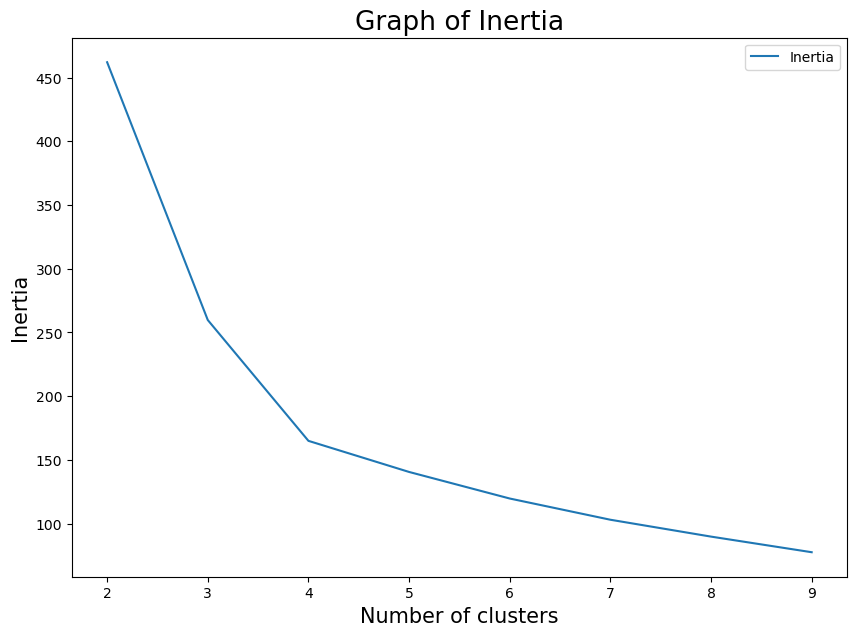

In [5]:
plt.figure(figsize = (10, 7))

plt.title('Graph of Inertia', fontsize = 19)

plt.plot(range_n_clusters, inertia, label = 'Inertia')

plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Inertia', fontsize = 15)

plt.legend()

plt.show()

**Comments:** We can choose $ K = 3 $ or $ K = 4 $.

#### **Graph for K = 3**

In [6]:
model_3 = KMeans(n_clusters = 3, random_state = 0, n_init = 10).fit(X)

In [7]:
label_3 = model_3.predict(X)

In [8]:
X_3_0 = X[:, 0][label_3 == 0]
Y_3_0 = X[:, 1][label_3 == 0]

X_3_1 = X[:, 0][label_3 == 1]
Y_3_1 = X[:, 1][label_3 == 1]

X_3_2 = X[:, 0][label_3 == 2]
Y_3_2 = X[:, 1][label_3 == 2]

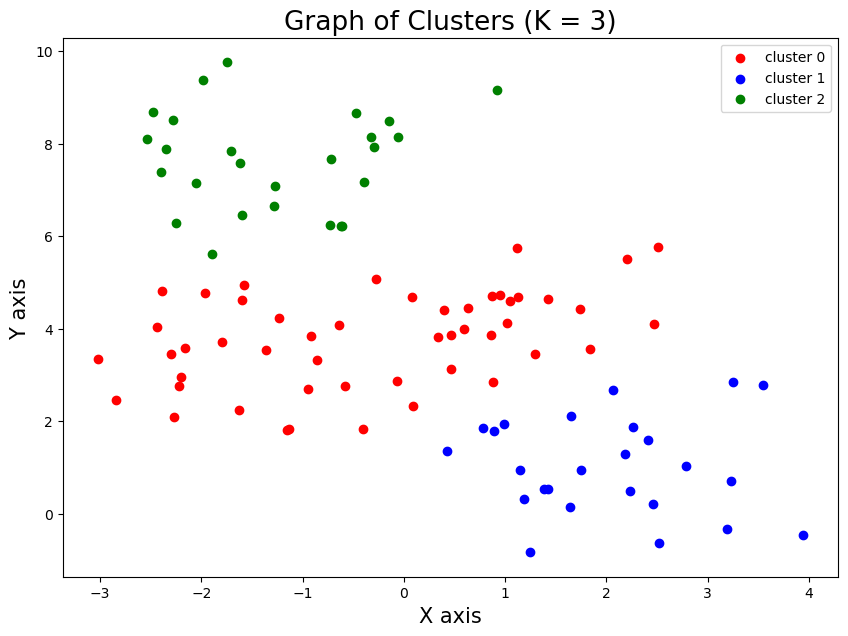

In [9]:
plt.figure(figsize = (10, 7))

plt.title('Graph of Clusters (K = 3)', fontsize = 19)

plt.scatter(X_3_0, Y_3_0, color = 'red', label = 'cluster 0')
plt.scatter(X_3_1, Y_3_1, color = 'blue', label = 'cluster 1')
plt.scatter(X_3_2, Y_3_2, color = 'green', label = 'cluster 2')

plt.xlabel('X axis', fontsize = 15)
plt.ylabel('Y axis', fontsize = 15)

plt.legend()

plt.show()

#### **Graph for K = 4**

In [10]:
model_4 = KMeans(n_clusters = 4, random_state = 0, n_init = 10).fit(X)

In [11]:
label_4 = model_4.predict(X)

In [12]:
X_4_0 = X[:, 0][label_4 == 0]
Y_4_0 = X[:, 1][label_4 == 0]

X_4_1 = X[:, 0][label_4 == 1]
Y_4_1 = X[:, 1][label_4 == 1]

X_4_2 = X[:, 0][label_4 == 2]
Y_4_2 = X[:, 1][label_4 == 2]

X_4_3 = X[:, 0][label_4 == 3]
Y_4_3 = X[:, 1][label_4 == 3]

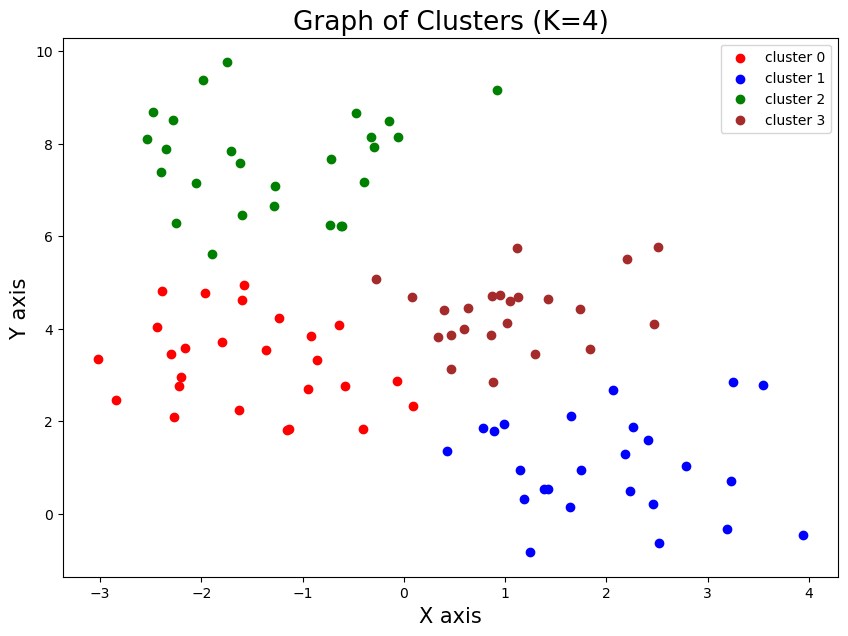

In [13]:
plt.figure(figsize = (10, 7))

plt.title('Graph of Clusters (K=4)', fontsize = 19)

plt.scatter(X_4_0, Y_4_0, color = 'red', label = 'cluster 0')
plt.scatter(X_4_1, Y_4_1, color = 'blue', label = 'cluster 1')
plt.scatter(X_4_2, Y_4_2, color = 'green', label = 'cluster 2')
plt.scatter(X_4_3, Y_4_3, color = 'brown', label = 'cluster 3')

plt.xlabel('X axis', fontsize = 15)
plt.ylabel('Y axis', fontsize = 15)

plt.legend()

plt.show()

### 2. Silhouette Coefficient

To compute the "Silhouette Coefficient" of a model you have to average the "Silhouette Coefficient" for each point. 

The "Silhouette Score" is a measure of how similar is a point to its own cluster (cohesion) compared to other clusters (separation). It only can take values from -1 to 1 ($[-1, 1]$), meanwhile the score is bigger best is the clusterization. For this reason we choose the $K$ which its "Silhouette Coefficient" is bigger. 

Now we going to explain how compute the silhouette score for each pint.

$ \ $

Consider the $i$-th point.

i. We compute $a(i)$ that corresponds to the average distance from the point to the other points of the cluster. 

ii. We compute $b(i)$ that corresponds to the average distance from the point to the points of the nearest cluster to the cluster that $i$ belong.

iii. We compute the "Silhouette Score" $(S(i))$:

$ S(i) = \cfrac{b(i) - a(i)}{max [a(i), b(i)]} $



In [14]:
from sklearn.metrics import silhouette_score

In [15]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

sil_sco = []

for n_clusters in range_n_clusters:

    model = KMeans(n_clusters = n_clusters, random_state = 0, n_init = 10).fit(X)

    s_sco = silhouette_score(X, model.predict(X), metric = 'euclidean')

    sil_sco.append(s_sco)

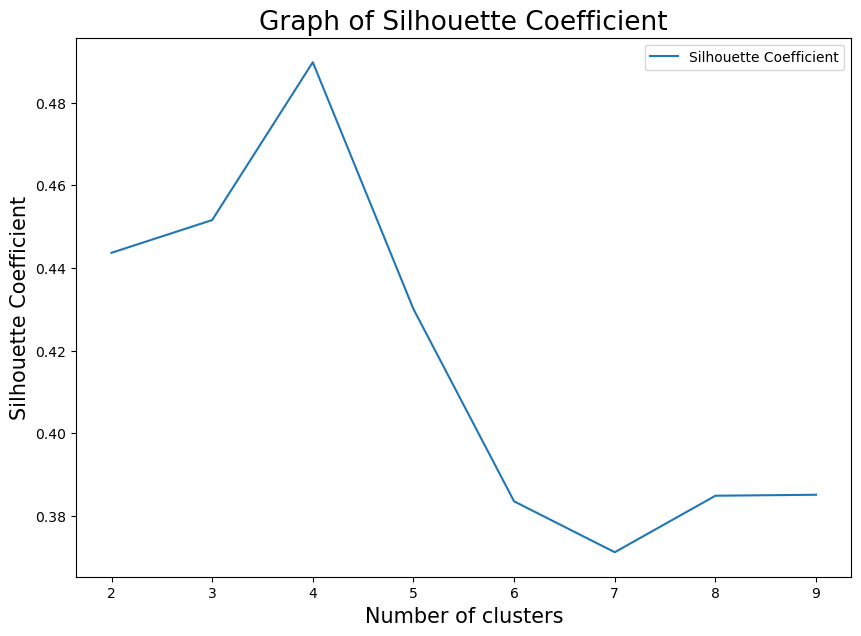

In [16]:
plt.figure(figsize = (10, 7))

plt.title('Graph of Silhouette Coefficient', fontsize = 19)

plt.plot(range_n_clusters, sil_sco, label = 'Silhouette Coefficient')

plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Silhouette Coefficient', fontsize = 15)

plt.legend()

plt.show()

**Comments:** We can choose $ K = 4 $.

#### **Graph for K = 4**

In [17]:
model_4 = KMeans(n_clusters = 4, random_state = 0, n_init = 10).fit(X)

In [18]:
label_4 = model_4.predict(X)

In [19]:
X_4_0 = X[:, 0][label_4 == 0]
Y_4_0 = X[:, 1][label_4 == 0]

X_4_1 = X[:, 0][label_4 == 1]
Y_4_1 = X[:, 1][label_4 == 1]

X_4_2 = X[:, 0][label_4 == 2]
Y_4_2 = X[:, 1][label_4 == 2]

X_4_3 = X[:, 0][label_4 == 3]
Y_4_3 = X[:, 1][label_4 == 3]

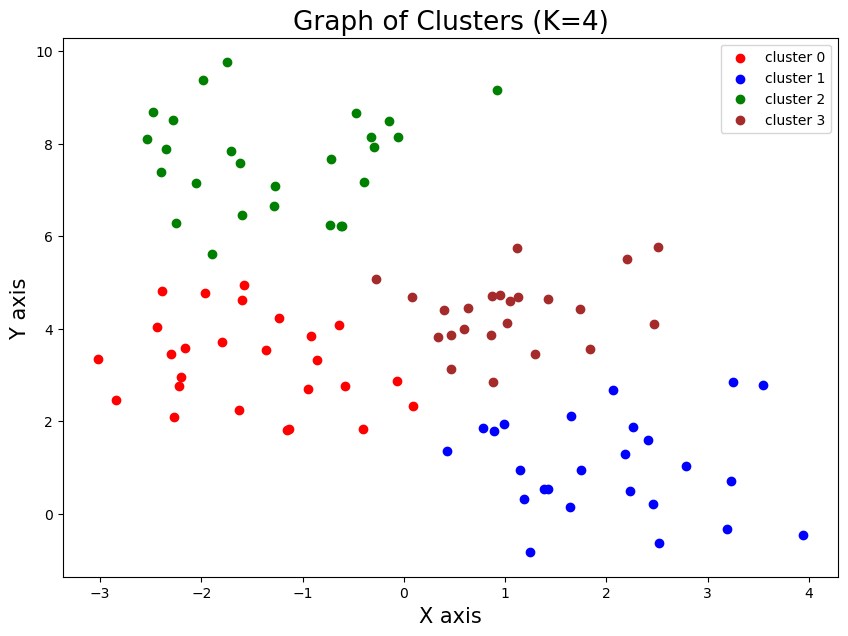

In [20]:
plt.figure(figsize = (10, 7))

plt.title('Graph of Clusters (K=4)', fontsize = 19)

plt.scatter(X_4_0, Y_4_0, color = 'red', label = 'cluster 0')
plt.scatter(X_4_1, Y_4_1, color = 'blue', label = 'cluster 1')
plt.scatter(X_4_2, Y_4_2, color = 'green', label = 'cluster 2')
plt.scatter(X_4_3, Y_4_3, color = 'brown', label = 'cluster 3')

plt.xlabel('X axis', fontsize = 15)
plt.ylabel('Y axis', fontsize = 15)

plt.legend()

plt.show()